## APPLE STOCK PRICE PREDICTION USING TIME SERIES ARIMA MODEL

**Importing necessary libraries**

In [159]:
# Regular libraries for data manipulation
import pprint
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
# Visualization
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical tools for time series analysis
from scipy import signal
import statsmodels.api as sm
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("whitegrid")
plt.rc('xtick', labelsize=5) 
plt.rc('ytick', labelsize=15)

from pylab import rcParams

In [160]:
data1=pd.read_csv(r"C:\Users\manvi_mgzmezo\Documents\Downloads\apple.csv")

In [161]:
data1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-28 00:00:00+00:00,178.23,180.59,177.91,178.92,27948160,43.002889,43.572304,42.925681,43.169371,111792640,0.0,1
1,AAPL,2019-05-29 00:00:00+00:00,177.38,179.35,176.00,176.42,28481165,42.797804,43.273120,42.464841,42.566177,113924660,0.0,1
2,AAPL,2019-05-30 00:00:00+00:00,178.30,179.23,176.67,177.95,21218412,43.019779,43.244167,42.626497,42.935332,84873648,0.0,1
3,AAPL,2019-05-31 00:00:00+00:00,175.07,177.99,174.99,176.23,27043584,42.240453,42.944983,42.221150,42.520334,108174336,0.0,1
4,AAPL,2019-06-03 00:00:00+00:00,173.30,177.92,170.27,175.60,40396069,41.813391,42.928093,41.082320,42.368330,161584276,0.0,1


In [162]:
data1.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000
mean,187.343860,189.281710,185.150068,187.098637,7.015587e+07,132.109266,133.468565,130.622259,131.995055,9.660214e+07,0.005854,1.002383
std,69.129819,69.777555,68.129657,68.846314,3.755232e+07,43.073502,43.381111,42.751688,43.072105,5.195294e+07,0.055411,0.084549
min,106.840000,110.190000,103.100000,104.540000,1.136204e+07,41.813391,42.928093,41.082320,42.329725,2.404834e+07,0.000000,1.000000
25%,144.820000,146.500000,142.656100,144.052500,4.514935e+07,109.644161,111.268301,107.623769,110.055088,6.319716e+07,0.000000,1.000000
50%,169.650000,171.240000,168.240000,169.590000,6.490233e+07,142.546558,144.363929,140.535736,141.727218,8.347715e+07,0.000000,1.000000
75%,194.820000,196.628000,193.635000,195.200000,8.855039e+07,168.307585,169.763455,166.769775,168.431051,1.135917e+08,0.000000,1.000000
max,506.090000,515.140000,500.330000,514.790000,3.326072e+08,197.588695,199.094722,196.481616,197.498932,4.268849e+08,0.820000,4.000000


In [163]:
data1.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [164]:
data1.shape

(1259, 14)

In [165]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1259 non-null   object 
 1   date         1259 non-null   object 
 2   close        1259 non-null   float64
 3   high         1259 non-null   float64
 4   low          1259 non-null   float64
 5   open         1259 non-null   float64
 6   volume       1259 non-null   int64  
 7   adjClose     1259 non-null   float64
 8   adjHigh      1259 non-null   float64
 9   adjLow       1259 non-null   float64
 10  adjOpen      1259 non-null   float64
 11  adjVolume    1259 non-null   int64  
 12  divCash      1259 non-null   float64
 13  splitFactor  1259 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 137.8+ KB


In [166]:
data1['date'] = pd.to_datetime(data1['date'])

In [167]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1259 non-null   object             
 1   date         1259 non-null   datetime64[ns, UTC]
 2   close        1259 non-null   float64            
 3   high         1259 non-null   float64            
 4   low          1259 non-null   float64            
 5   open         1259 non-null   float64            
 6   volume       1259 non-null   int64              
 7   adjClose     1259 non-null   float64            
 8   adjHigh      1259 non-null   float64            
 9   adjLow       1259 non-null   float64            
 10  adjOpen      1259 non-null   float64            
 11  adjVolume    1259 non-null   int64              
 12  divCash      1259 non-null   float64            
 13  splitFactor  1259 non-null   int64              
dtypes: datetime64[ns, UTC](1

**Converting date into data type datetime64[ns, UTC] is highly recommended for datetime data analysis due to its precision, timezone-awareness, compatibility with data analysis tools, and support for a wide range of operations.**

In [168]:
data2 = data1.drop(columns=['symbol', 'divCash','splitFactor'])

In [169]:
data2.info

<bound method DataFrame.info of                           date   close      high       low     open    volume  \
0    2019-05-28 00:00:00+00:00  178.23  180.5900  177.9100  178.920  27948160   
1    2019-05-29 00:00:00+00:00  177.38  179.3500  176.0000  176.420  28481165   
2    2019-05-30 00:00:00+00:00  178.30  179.2300  176.6700  177.950  21218412   
3    2019-05-31 00:00:00+00:00  175.07  177.9900  174.9900  176.230  27043584   
4    2019-06-03 00:00:00+00:00  173.30  177.9200  170.2700  175.600  40396069   
...                        ...     ...       ...       ...      ...       ...   
1254 2024-05-20 00:00:00+00:00  191.04  191.9199  189.0100  189.325  44361275   
1255 2024-05-21 00:00:00+00:00  192.35  192.7300  190.9201  191.090  42309401   
1256 2024-05-22 00:00:00+00:00  190.90  192.8231  190.2700  192.265  34648547   
1257 2024-05-23 00:00:00+00:00  186.88  191.0000  186.6250  190.980  51005924   
1258 2024-05-24 00:00:00+00:00  189.98  190.5800  188.0404  188.820  36326975

In [170]:
print(data2.columns)

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume'],
      dtype='object')


### Data Visualization

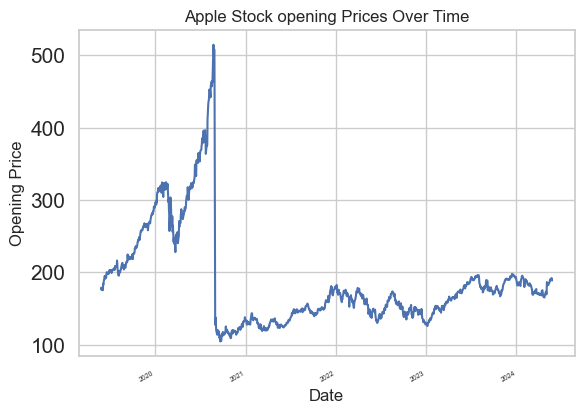

In [171]:
data2.plot(x='date', y='open', kind='line', title='Apple Stock opening Prices Over Time', legend=False)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.show()

**the plot seems to be related to a significant drop or spike in the price around a specific date, which might be due to a stock split or another corporate action that wasn't adjusted for in the dataset.Therefore,Use the adjusted prices (adjClose, adjOpen, etc.) instead of the raw prices.**

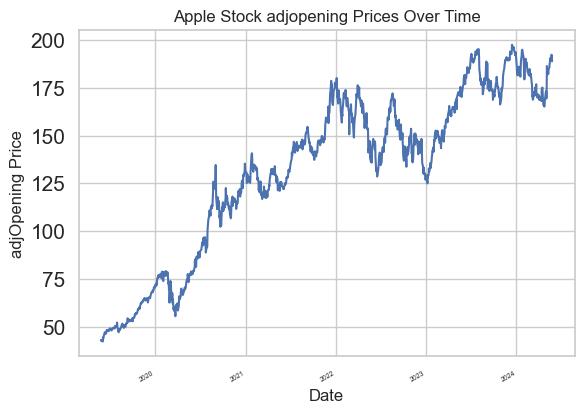

In [172]:
data2.plot(x='date', y='adjOpen', kind='line', title='Apple Stock adjopening Prices Over Time', legend=False)
plt.xlabel('Date')
plt.ylabel('adjOpening Price')
plt.show()

**Plot for Apple stock prices over time**

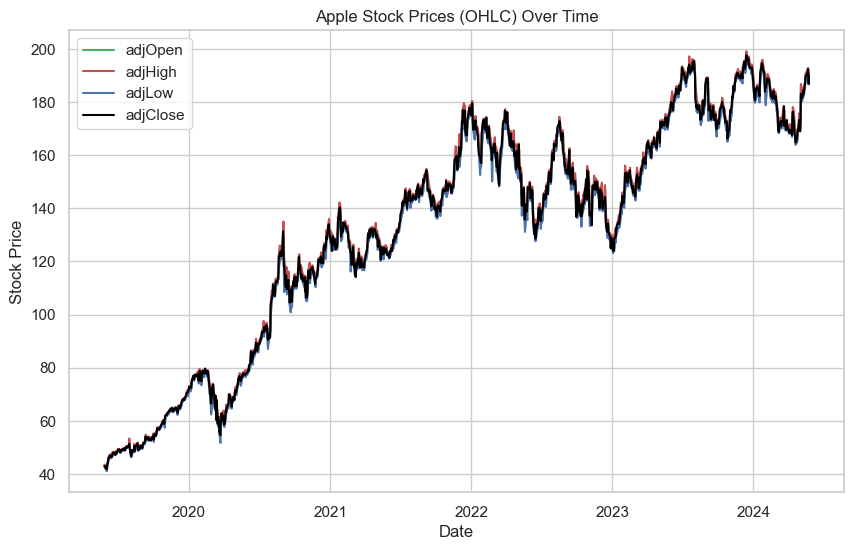

In [178]:
# Create the plot
data2['date'] = pd.to_datetime(data2['date'])
data2.set_index('date', inplace=True)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x=data2.index, y=data2['adjOpen'], label='adjOpen', color='g')
sns.lineplot(x=data2.index, y=data2['adjHigh'], label='adjHigh', color='r')
sns.lineplot(x=data2.index, y=data2['adjLow'], label='adjLow', color='b')
sns.lineplot(x=data2.index, y=data2['adjClose'], label='adjClose', color='black')
plt.title('Apple Stock Prices (OHLC) Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

**Plot for Apple stock Volume over time**

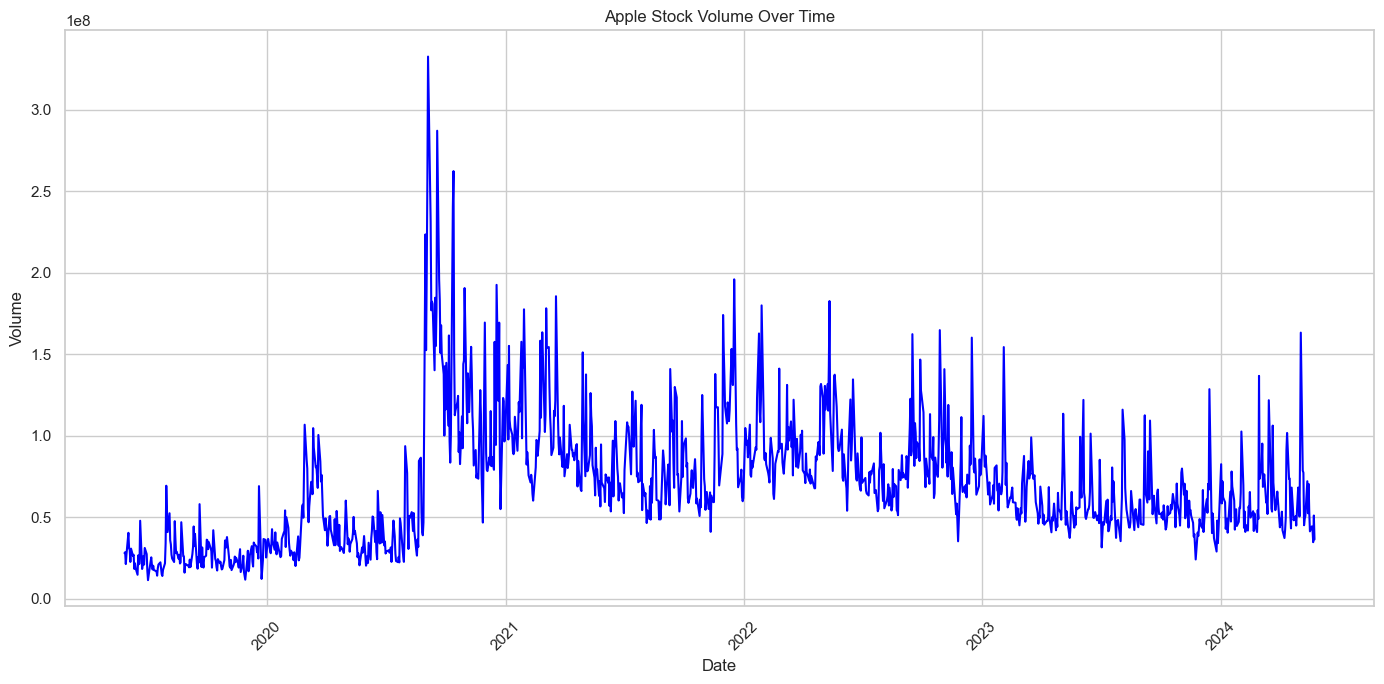

In [79]:
# Plotting the data
# Convert 'date' column to datetime if it's not already
data2['date'] = pd.to_datetime(data2['date'])

# Set the date as the index for better plotting
data2.set_index('date', inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(data2.index, data2['volume'], color='blue')
plt.title('Apple Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

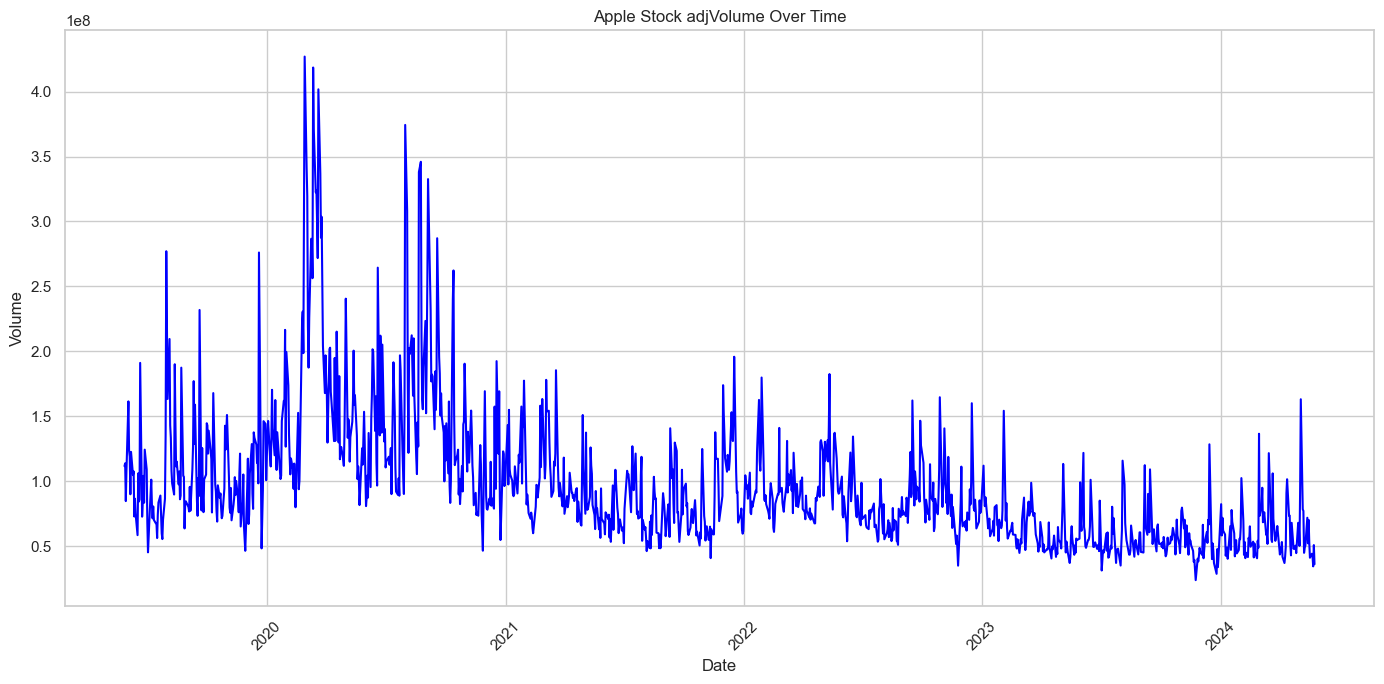

In [80]:

plt.figure(figsize=(14, 7))
plt.plot(data2.index, data2['adjVolume'], color='blue')
plt.title('Apple Stock adjVolume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [81]:
# Verify the date range
print(data2.index.min(), data2.index.max())

2019-05-28 00:00:00+00:00 2024-05-24 00:00:00+00:00


# Data Analysis

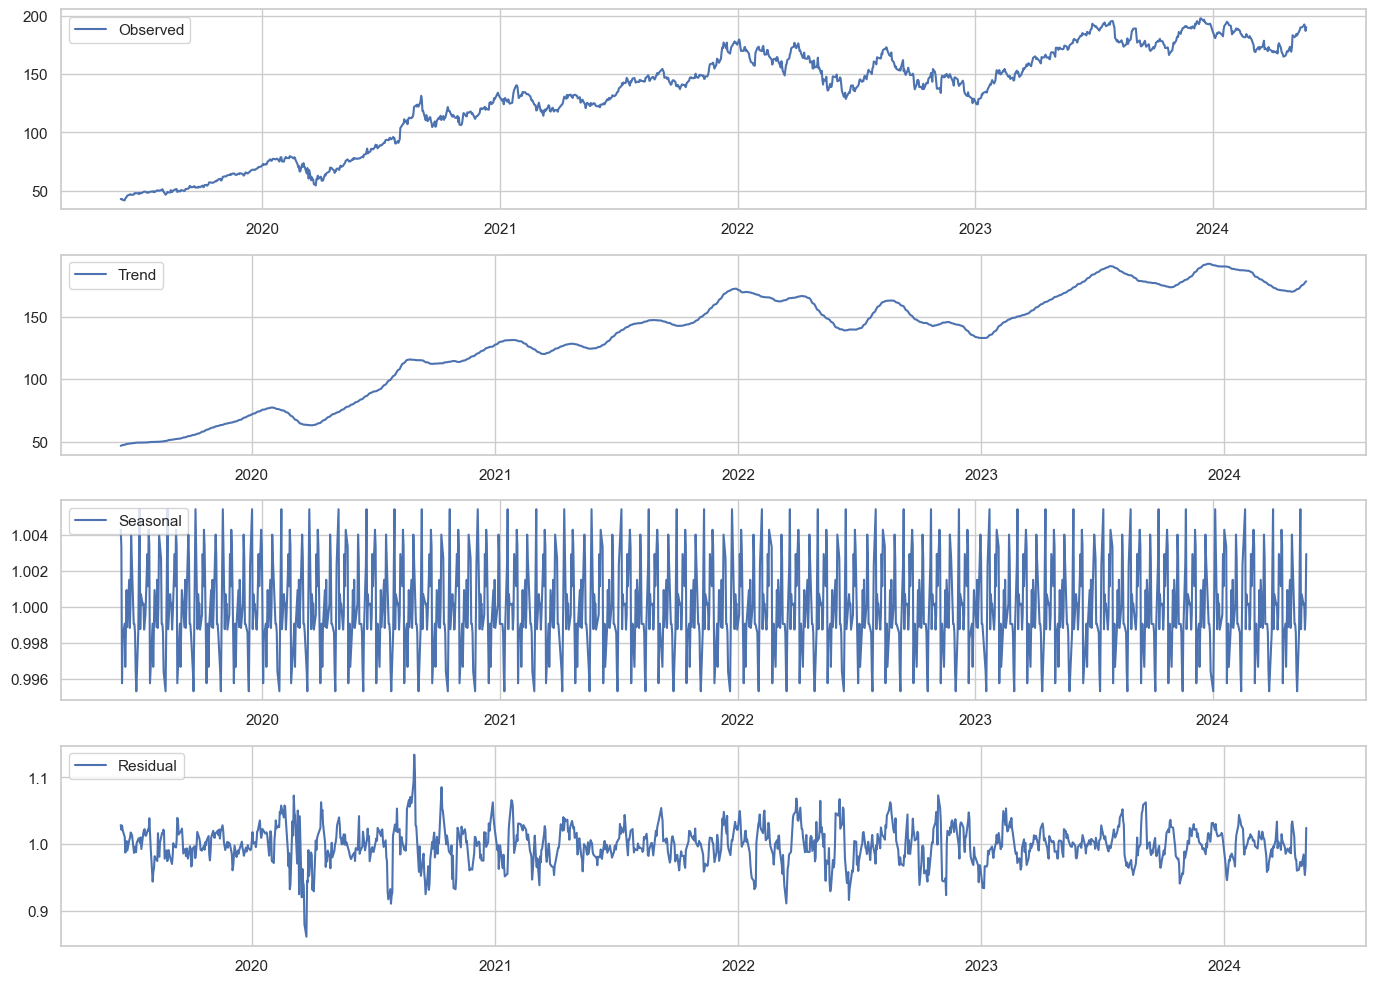

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition on 'Adj Close'
decomposition = seasonal_decompose(data2['adjClose'], model='multiplicative', period=30)  #  daily data, adjust period if needed

# Plotting the decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**The three components are shown separately in the bottom three panels. These components can be multiplied together to reconstruct the data shown in the top panel. We can see that the seasonal component changes over time.The residual component shown in the bottom panel is what is left over when the seasonal and trend-cycle components have been subtracted from the data.If the seasonal component is removed from the original data, the resulting values are the “seasonally adjusted” data. For an additive decomposition, the seasonally adjusted data are given by yt−St, and for multiplicative data, the seasonally adjusted values are obtained using yt/St.**

### Stationarity Check

**A stationary Time Series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary**

In [83]:
# Perform the ADF test
result = adfuller(data2['adjClose'])   # for adjClose

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The time series is non-stationary.")

ADF Statistic: -1.625064
p-value: 0.470076
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Fail to reject the null hypothesis (H0): The time series is non-stationary.


In [84]:
# Perform the ADF test
result = adfuller(data2['adjOpen'])  # for Adjopen

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0): The time series is non-stationary.")

ADF Statistic: -1.646360
p-value: 0.458939
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Fail to reject the null hypothesis (H0): The time series is non-stationary.


**In the context of financial data, the adjClose (adjusted closing price) is a commonly used measure because it reflects the stock price after adjustments for all applicable splits and dividend distributions. The adjClose is considered a more accurate reflection of a stock's value over time, making it a good candidate for time series analysis and stationarity testing.**

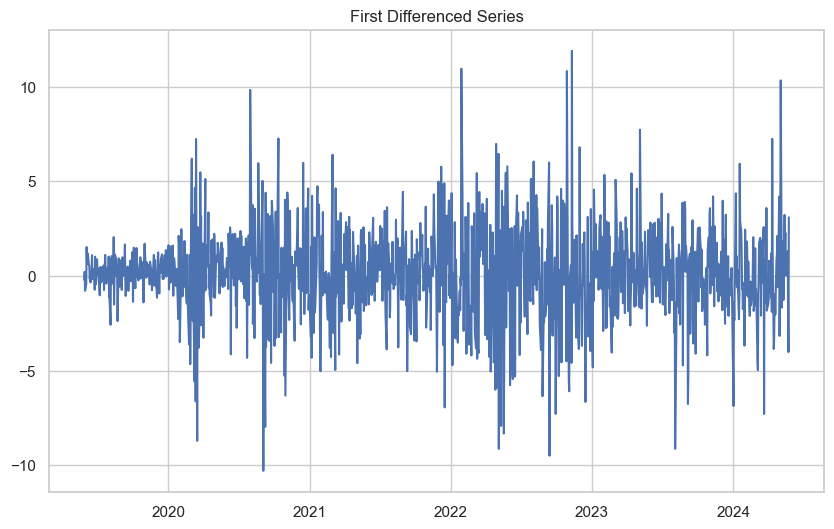

In [85]:
# Differencing
data2['FirstDifference'] = data2['adjClose'].diff().dropna()
# Plotting the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data2['FirstDifference'])
plt.title('First Differenced Series')
plt.show()

**From the first differenced series we can see that now series is stationary.**

In [86]:
# Assuming 'data' is your DataFrame with the 'adjClose' column
# Compute first difference and drop NaN values
data2['FirstDifference'] = data2['adjClose'].diff().dropna()

# Check for NaN or inf values in the first differenced series
if np.any(np.isnan(data2['FirstDifference'])) or np.any(np.isinf(data2['FirstDifference'])):
    # Handle the presence of NaN or inf values appropriately
    data2['FirstDifference'].fillna(method='bfill', inplace=True)  # Example: Filling NaN values with backward fill

# Perform ADF test on the first differenced series
result = adfuller(data2['FirstDifference'])

# Extract and print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -36.46969080935677
p-value: 0.0
Critical Values:
	1%: -3.4355588184378574
	5%: -2.8638402312881497
	10%: -2.5679946684494275


**Now series is stationary as p value is less than 0.05.**

**Autocorrelation and partial autocorrelation**

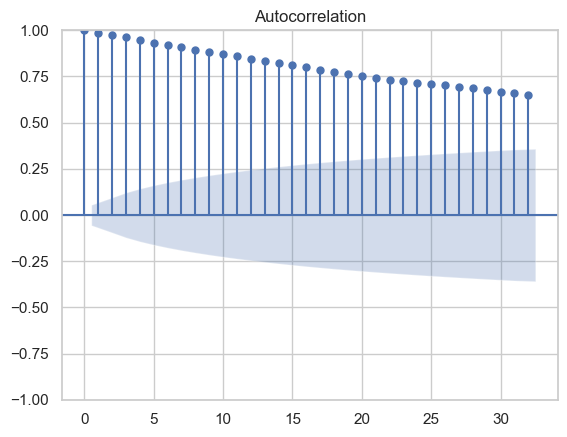

In [87]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data2['close'])
plt.show()

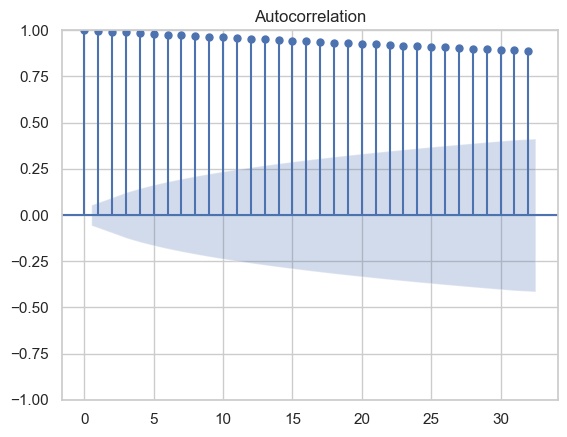

In [88]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data2['adjClose'])
plt.show()

**The high and persistent autocorrelation values suggest that the time series is non-stationary. In a stationary series, autocorrelation values typically decrease rapidly towards zero as the lag increases.Such a pattern is often seen in time series with a trend or strong seasonality. In this case, it looks like the time series might have a strong trend component since the autocorrelation does not diminish with increasing lag.**

<Figure size 1000x500 with 0 Axes>

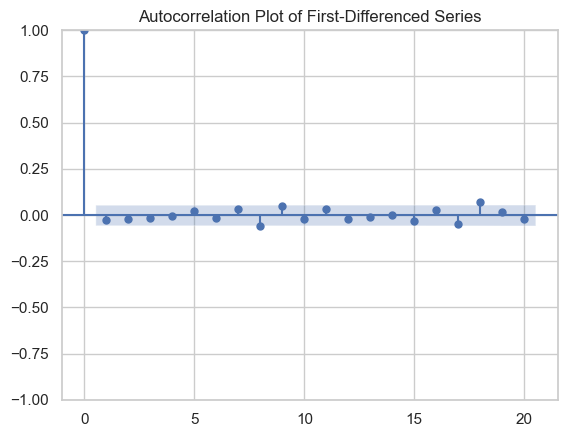

In [109]:
data2['FirstDifference'] = data2['adjClose'].diff().dropna()
# Plotting the autocorrelation plot
plt.figure(figsize=(10, 5))
plot_acf(differenced_data, lags=20)
plt.title('Autocorrelation Plot of First-Differenced Series')
plt.show()

<Figure size 1000x500 with 0 Axes>

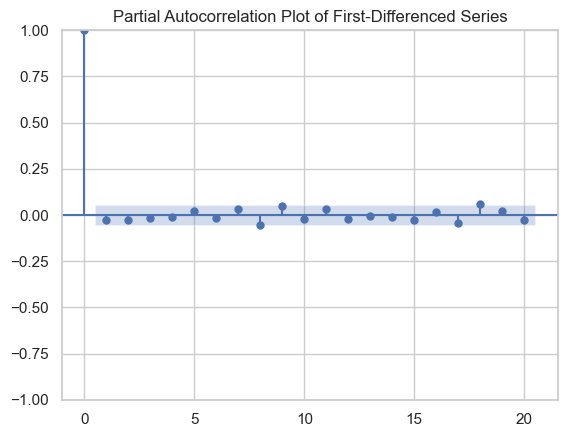

In [110]:
# First differencing the 'adjClose' series
from statsmodels.graphics.tsaplots import plot_pacf
data2['FirstDifference'] = data2['adjClose'].diff().dropna()
# Plotting the partial autocorrelation plot
plt.figure(figsize=(10, 5))
plot_pacf(differenced_data, lags=20)
plt.title('Partial Autocorrelation Plot of First-Differenced Series')
plt.show()

**Lag Scatterplot**

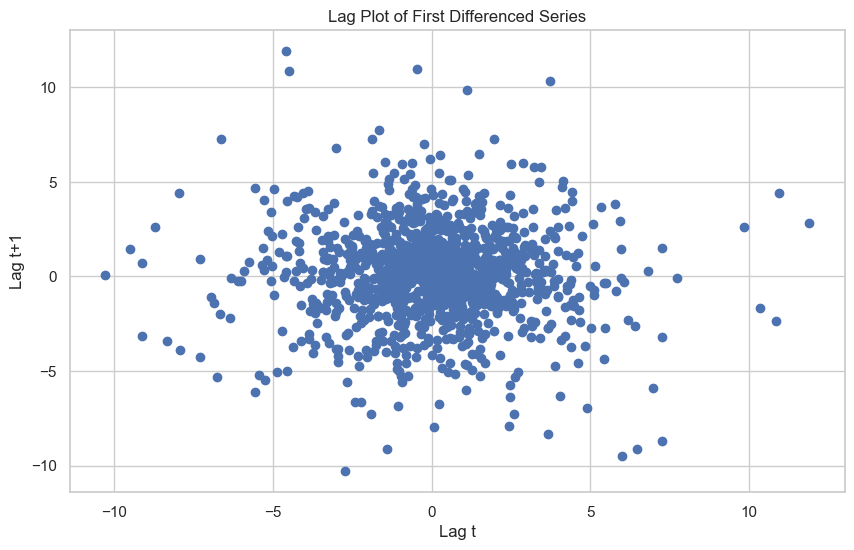

In [115]:
# Lag plot
plt.figure(figsize=(10, 6))
lag_plot(data2['FirstDifference'])
plt.title('Lag Plot of First Differenced Series')
plt.xlabel('Lag t')
plt.ylabel('Lag t+1')
plt.show()

**The graph suggest no relationship at lag 1**

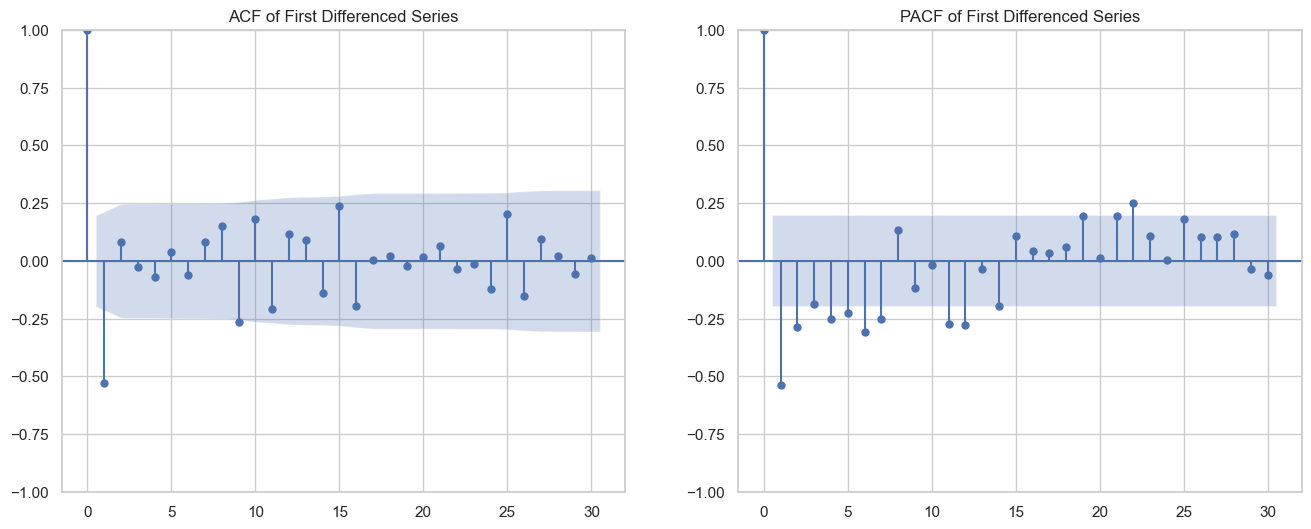

In [119]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame with numeric data in 'adjClose'
# Example: Generating random data
np.random.seed(0)
data2 = pd.DataFrame({'adjClose': np.random.randn(100)})

# First Differencing
data2['FirstDifference'] = data2['adjClose'].diff().dropna()

# Drop the first NA value created by differencing
data2 = data2.dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data2['FirstDifference'], lags=30, ax=axes[0])
axes[0].set_title('ACF of First Differenced Series')
plot_pacf(data2['FirstDifference'], lags=30, ax=axes[1])
axes[1].set_title('PACF of First Differenced Series')
plt.show()

**From ACF and PACF plot we will look for value p and q for AR and MA order**

In [120]:
# Fit the ARIMA model
# Fit ARIMA model
model = ARIMA(data2['adjClose'], order=(1, 1, 1))
fitted_model = model.fit()


# Print the model summary
print(fitted_model.summary())



                               SARIMAX Results                                
Dep. Variable:               adjClose   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -139.328
Date:                Thu, 11 Jul 2024   AIC                            284.656
Time:                        20:22:59   BIC                            292.411
Sample:                             0   HQIC                           287.793
                                 - 99                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0366      0.110     -0.332      0.740      -0.253       0.179
ma.L1         -0.9010      0.057    -15.734      0.000      -1.013      -0.789
sigma2         0.9879      0.144      6.876      0.0

In [121]:


# Fit the ARIMA model
# Fit ARIMA model
model = ARIMA(data2['adjClose'], order=(0, 1, 0))
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())



                               SARIMAX Results                                
Dep. Variable:               adjClose   No. Observations:                   99
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -169.860
Date:                Thu, 11 Jul 2024   AIC                            341.720
Time:                        20:23:20   BIC                            344.305
Sample:                             0   HQIC                           342.766
                                 - 99                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.8751      0.262      7.150      0.000       1.361       2.389
Ljung-Box (L1) (Q):                  28.58   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.00   Pr

In [126]:
# Fit the ARIMA model
# Fit ARIMA model
model = ARIMA(data2['adjClose'], order=(0, 1, 1))
fitted_model = model.fit()

# Print the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:               adjClose   No. Observations:                   99
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -139.385
Date:                Thu, 11 Jul 2024   AIC                            282.770
Time:                        20:51:24   BIC                            287.940
Sample:                    01-01-1970   HQIC                           284.861
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9065      0.047    -19.108      0.000      -0.999      -0.814
sigma2         0.9892      0.142      6.958      0.000       0.711       1.268
Ljung-Box (L1) (Q):                   0.15   Jarque-

**We will take value of P=0, d=1, q=1 , since AIC is lower for that for Classic ARIMA**


                               SARIMAX Results                                
Dep. Variable:               adjClose   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -73.481
Date:                Thu, 11 Jul 2024   AIC                            150.963
Time:                        21:03:28   BIC                            154.663
Sample:                    05-31-2019   HQIC                           152.355
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9072      0.068    -13.327      0.000      -1.041      -0.774
sigma2         1.2868      0.272      4.737      0.000       0.754       1.819
Ljung-Box (L1) (Q):                   0.03   Jarque-

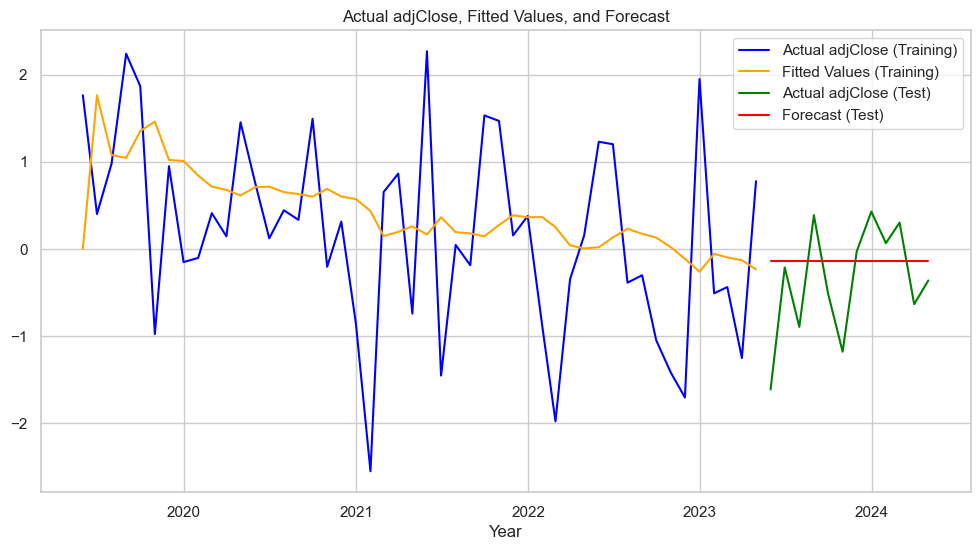

Root Mean Square Error (RMSE): 0.6527979663391913
Mean Absolute Error (MAE): 0.5238679601363047


In [130]:
# Assuming 'data' is your DataFrame with 'adjClose' and a proper datetime index
# For demonstration, let's create some synthetic data with a datetime index
date_rng = pd.date_range(start='28/05/2019', end='24/05/2024', freq='M')
np.random.seed(0)
data2 = pd.DataFrame(date_rng, columns=['date'])
data2['adjClose'] = np.random.randn(len(date_rng))
data2 = data2.set_index('date')

# Split the data into training and testing sets
train_size = int(len(data2) * 0.8)
train, test = data2[:train_size], data2[train_size:]

# Fit ARIMA model on training data
p = 0  # Order of the AR term
d = 1  # Order of differencing
q = 1  # Order of the MA term

model = ARIMA(train['adjClose'], order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Generate fitted values for the training set
fitted_values = fitted_model.fittedvalues

# Forecast the test set
forecast = fitted_model.forecast(steps=len(test))

# Plot actual adjClose, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['adjClose'], label='Actual adjClose (Training)', color='blue')
plt.plot(train.index, fitted_values, label='Fitted Values (Training)', color='orange')
plt.plot(test.index, test['adjClose'], label='Actual adjClose (Test)', color='green')
plt.plot(test.index, forecast, label='Forecast (Test)', color='red')
plt.title('Actual adjClose, Fitted Values, and Forecast')
plt.xlabel('Year')
plt.legend()
plt.show()

# Calculate RMSE and MAE for the forecast
rmse = np.sqrt(mean_squared_error(test['adjClose'], forecast))
mae = mean_absolute_error(test['adjClose'], forecast)

print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')



**The above forecasting is using classic ARIMA but since seasonal component is there. Hence we will do forecasting using SARIMA also**


### Forecasting using SARIMA

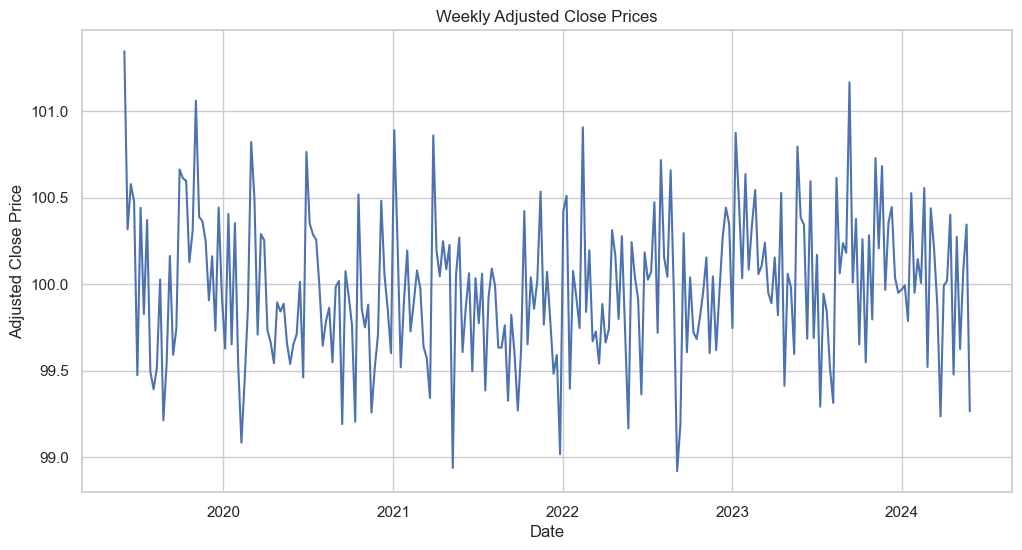

                                     SARIMAX Results                                      
Dep. Variable:                           adjClose   No. Observations:                  208
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -127.241
Date:                            Fri, 12 Jul 2024   AIC                            260.482
Time:                                    11:51:12   BIC                            269.612
Sample:                                06-02-2019   HQIC                           264.190
                                     - 05-21-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9438      0.034    -27.445      0.000      -1.011      -0.876
ma.S.L52      -0.9681      2.542   

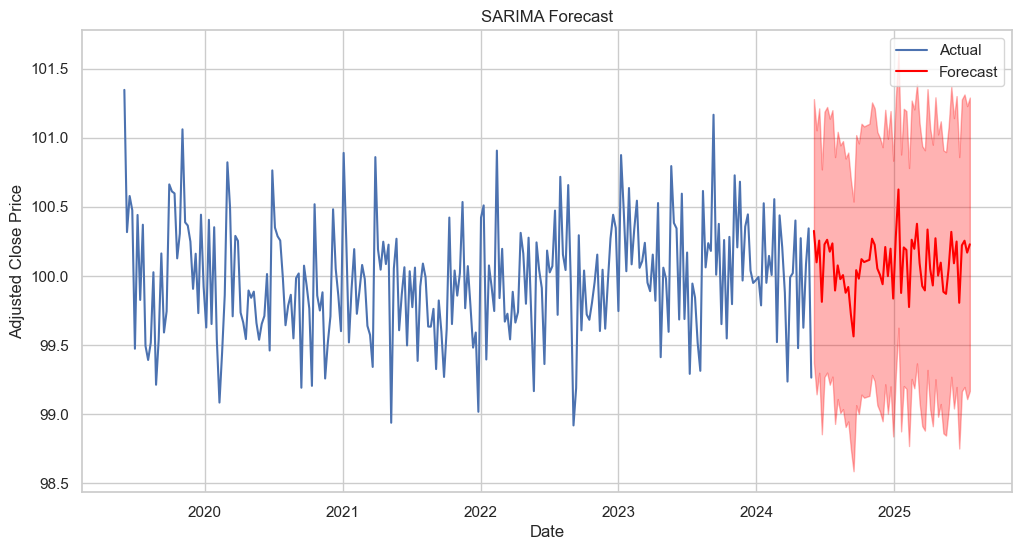

In [150]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic daily data for demonstration
date_rng = pd.date_range(start='2019-05-28', end='2024-05-24', freq='B')
np.random.seed(0)
data2 = pd.DataFrame(date_rng, columns=['date'])
data2['adjClose'] = np.random.randn(len(date_rng)) + 100
data2 = data2.set_index('date')

# Downsample the data to weekly frequency
data2_weekly = data2['adjClose'].resample('W').mean()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data2_weekly)
plt.title('Weekly Adjusted Close Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# Split the data into training and testing sets
train_size = int(len(data2_weekly) * 0.8)
train, test = data2_weekly[:train_size], data2_weekly[train_size:]

# Fit SARIMA model on training data
p, d, q = 0, 1, 1
P, D, Q, s = 0, 1, 1, 52  # Seasonal order for yearly seasonality

model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
fitted_model = model.fit(disp=False)

# Print model summary
print(fitted_model.summary())

# Forecast the next 60 periods (weeks in this case)
forecast_steps = 60
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps+1, freq='W')[1:]
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot actual values and forecast
plt.figure(figsize=(12, 6))
plt.plot(data2_weekly.index, data2_weekly, label='Actual')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


**The above result is forecasting using SARIMA**